In [1]:
# 1. Data Collection and Initial Exploration

import os
import kaggle
import pandas as pd
import zipfile

# Kaggle API Authentication
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")

In [2]:
# Define the directory for data storage
data_path = "./data"
os.makedirs(data_path, exist_ok=True)

# Download dataset from Kaggle API
!kaggle datasets download -d jboysen/mri-and-alzheimers -p {data_path} --unzip
print("Dataset downloaded and extracted in './data'")

Dataset URL: https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers
License(s): CC0-1.0
  0%|                                               | 0.00/12.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 12.6k/12.6k [00:00<00:00, 10.6MB/s]
Dataset downloaded and extracted in './data'


In [3]:
# List available files
files = os.listdir(data_path)
print("Files in dataset:", files)

# Load primary datasets
cross_sectional_path = os.path.join(data_path, 'oasis_cross-sectional.csv')
longitudinal_path = os.path.join(data_path, 'oasis_longitudinal.csv')

df_cross_sectional = pd.read_csv(cross_sectional_path)
df_longitudinal = pd.read_csv(longitudinal_path)

Files in dataset: ['oasis_longitudinal.csv', 'oasis_cross-sectional.csv']


In [4]:
# Display dataset information
print("\nCross-Sectional Dataset Overview:")
df_cross_sectional.info()
print("\nLongitudinal Dataset Overview:")
df_longitudinal.info()


Cross-Sectional Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB

Longitudinal Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      37

In [5]:
# Display first few rows
print("\nFirst 5 rows of Cross-Sectional Dataset:")
display(df_cross_sectional.head())
print("\nFirst 5 rows of Longitudinal Dataset:")
display(df_longitudinal.head())


First 5 rows of Cross-Sectional Dataset:


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN



First 5 rows of Longitudinal Dataset:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
# Check for duplicates in the Cross-Sectional dataset
duplicates_cross = df_cross_sectional.duplicated().sum()
print(f"Duplicates in Cross-Sectional: {duplicates_cross}")

# Check for duplicates in the Longitudinal dataset
duplicates_long = df_longitudinal.duplicated().sum()
print(f"Duplicates in Longitudinal: {duplicates_long}")

Duplicates in Cross-Sectional: 0
Duplicates in Longitudinal: 0


In [11]:
# Remove the "Hand" column from both datasets since all values are "R" (Right-handed)
df_cross_sectional.drop(columns=['Hand'], inplace=True, errors='ignore')
df_longitudinal.drop(columns=['Hand'], inplace=True, errors='ignore')

In [12]:
# Remove the "Delay" column from the cross-sectional dataset due to high missing values
df_cross_sectional.drop(columns=['Delay'], inplace=True, errors='ignore')

In [13]:
# Display dataset information
print("\nCross-Sectional Dataset Overview:")
df_cross_sectional.info()
print("\nLongitudinal Dataset Overview:")
df_longitudinal.info()


Cross-Sectional Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Age     436 non-null    int64  
 3   Educ    235 non-null    float64
 4   SES     216 non-null    float64
 5   MMSE    235 non-null    float64
 6   CDR     235 non-null    float64
 7   eTIV    436 non-null    int64  
 8   nWBV    436 non-null    float64
 9   ASF     436 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 34.2+ KB

Longitudinal Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit 

In [14]:
# Count missing values in both datasets
missing_cross_sectional = df_cross_sectional.isnull().sum()
missing_longitudinal = df_longitudinal.isnull().sum()

# Calculate percentage of missing values
percent_missing_cross = (missing_cross_sectional / len(df_cross_sectional)) * 100
percent_missing_long = (missing_longitudinal / len(df_longitudinal)) * 100

# Display only columns with missing values
print("\nMissing Values - Cross-Sectional:")
print(percent_missing_cross[percent_missing_cross > 0].sort_values(ascending=False))

print("\nMissing Values - Longitudinal:")
print(percent_missing_long[percent_missing_long > 0].sort_values(ascending=False))


Missing Values - Cross-Sectional:
SES     50.458716
Educ    46.100917
MMSE    46.100917
CDR     46.100917
dtype: float64

Missing Values - Longitudinal:
SES     5.093834
MMSE    0.536193
dtype: float64


In [15]:
# Remove rows where both CDR and MMSE are missing
df_cross_sectional = df_cross_sectional.dropna(subset=['CDR', 'MMSE'], how='all')

In [16]:
# Count missing values in both datasets
missing_cross_sectional = df_cross_sectional.isnull().sum()
missing_longitudinal = df_longitudinal.isnull().sum()

# Calculate percentage of missing values
percent_missing_cross = (missing_cross_sectional / len(df_cross_sectional)) * 100
percent_missing_long = (missing_longitudinal / len(df_longitudinal)) * 100

# Display only columns with missing values
print("\nMissing Values - Cross-Sectional:")
print(percent_missing_cross[percent_missing_cross > 0].sort_values(ascending=False))

print("\nMissing Values - Longitudinal:")
print(percent_missing_long[percent_missing_long > 0].sort_values(ascending=False))


Missing Values - Cross-Sectional:
SES    8.085106
dtype: float64

Missing Values - Longitudinal:
SES     5.093834
MMSE    0.536193
dtype: float64


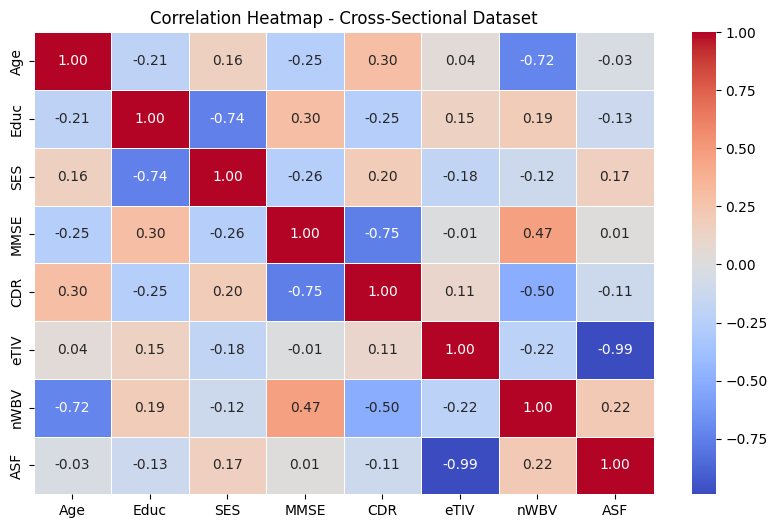

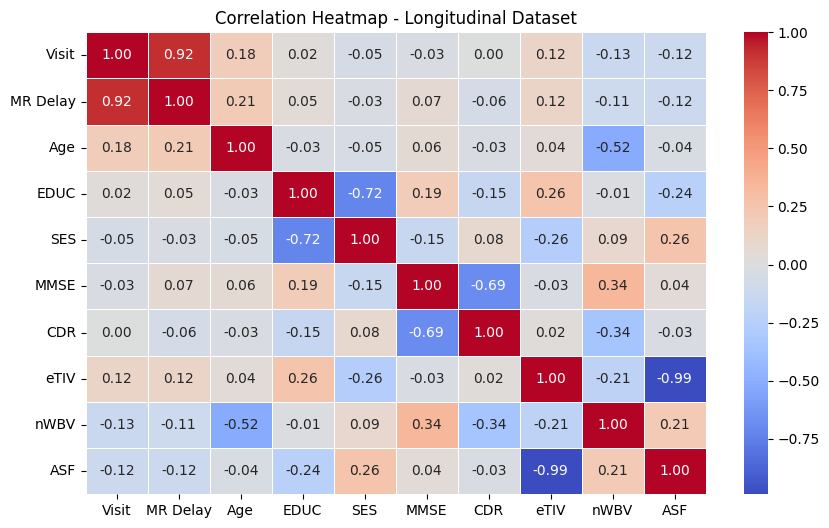

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols_cross = df_cross_sectional.select_dtypes(include=['int64', 'float64'])
numeric_cols_long = df_longitudinal.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrices
correlation_cross = numeric_cols_cross.corr()
correlation_long = numeric_cols_long.corr()

# Plot correlation heatmap for Cross-Sectional dataset
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_cross, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Cross-Sectional Dataset")
plt.show()

# Plot correlation heatmap for Longitudinal dataset
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_long, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Longitudinal Dataset")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

# Remove rows where SES or Educ is missing (for training)
train_data_ses_cross = df_cross_sectional.dropna(subset=['SES', 'Educ'])

# Define X (independent variable) and y (target variable)
X_train = train_data_ses_cross[['Educ']]
y_train = train_data_ses_cross['SES']

# Train Linear Regression model
model_ses_cross = LinearRegression()
model_ses_cross.fit(X_train, y_train)

# Predict SES for missing values
missing_ses_cross = df_cross_sectional['SES'].isnull()
df_cross_sectional.loc[missing_ses_cross, 'SES'] = model_ses_cross.predict(df_cross_sectional.loc[missing_ses_cross, ['Educ']])

In [22]:
# Remove rows where SES or EDUC is missing (for training)
train_data_ses_long = df_longitudinal.dropna(subset=['SES', 'EDUC'])

# Define X and y
X_train_long = train_data_ses_long[['EDUC']]
y_train_long = train_data_ses_long['SES']

# Train Linear Regression model
model_ses_long = LinearRegression()
model_ses_long.fit(X_train_long, y_train_long)

# Predict SES for missing values
missing_ses_long = df_longitudinal['SES'].isnull()
df_longitudinal.loc[missing_ses_long, 'SES'] = model_ses_long.predict(df_longitudinal.loc[missing_ses_long, ['EDUC']])

In [23]:
# Remove rows where MMSE or CDR is missing (for training)
train_data_mmse = df_longitudinal.dropna(subset=['MMSE', 'CDR'])

# Define X and y
X_train_mmse = train_data_mmse[['CDR']]
y_train_mmse = train_data_mmse['MMSE']

# Train Linear Regression model
model_mmse = LinearRegression()
model_mmse.fit(X_train_mmse, y_train_mmse)

# Predict MMSE for missing values
missing_mmse = df_longitudinal['MMSE'].isnull()
df_longitudinal.loc[missing_mmse, 'MMSE'] = model_mmse.predict(df_longitudinal.loc[missing_mmse, ['CDR']])

In [25]:
print("\nMissing Values After Estimation - Cross-Sectional:")
print(df_cross_sectional.isnull().sum())

print("\nMissing Values After Estimation - Longitudinal:")
print(df_longitudinal.isnull().sum())


Missing Values After Estimation - Cross-Sectional:
ID      0
M/F     0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

Missing Values After Estimation - Longitudinal:
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [29]:
# cheking for outliers
def count_outliers(df, column):
    """Counts the percentage of outliers using IQR."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100

    print(f"{column} - {len(outliers)} outliers detected ({percent_outliers:.2f}% of data)")
    return percent_outliers

# Check outliers in all numerical columns - Cross-Sectional
print("\nCross-Sectional Dataset Outliers:")
outliers_cross = {col: count_outliers(df_cross_sectional, col) for col in numeric_cols_cross}

# Check outliers in all numerical columns - Longitudinal
print("\nLongitudinal Dataset Outliers:")
outliers_long = {col: count_outliers(df_longitudinal, col) for col in numeric_cols_long}


Cross-Sectional Dataset Outliers:
Age - 3 outliers detected (1.28% of data)
Educ - 0 outliers detected (0.00% of data)
SES - 0 outliers detected (0.00% of data)
MMSE - 12 outliers detected (5.11% of data)
CDR - 2 outliers detected (0.85% of data)
eTIV - 4 outliers detected (1.70% of data)
nWBV - 0 outliers detected (0.00% of data)
ASF - 1 outliers detected (0.43% of data)

Longitudinal Dataset Outliers:
Age - 0 outliers detected (0.00% of data)
EDUC - 3 outliers detected (0.80% of data)
SES - 0 outliers detected (0.00% of data)
MMSE - 44 outliers detected (11.80% of data)
CDR - 3 outliers detected (0.80% of data)
eTIV - 2 outliers detected (0.54% of data)
nWBV - 0 outliers detected (0.00% of data)
ASF - 1 outliers detected (0.27% of data)


In [30]:
# Check MMSE outliers - longitudinal
outliers_mmse_long = df_longitudinal[df_longitudinal['MMSE'] < df_longitudinal['MMSE'].quantile(0.05)]
print("\nOutliers extremos de MMSE no Longitudinal Dataset:")
print(outliers_mmse_long)


Outliers extremos de MMSE no Longitudinal Dataset:
    Subject ID         MRI ID     Group  Visit  MR Delay M/F  Age  EDUC  SES  \
26   OAS2_0014  OAS2_0014_MR2  Demented      2       504   M   77    16  3.0   
89   OAS2_0044  OAS2_0044_MR2  Demented      2       352   M   69    14  4.0   
97   OAS2_0048  OAS2_0048_MR1  Demented      1         0   M   66    16  1.0   
99   OAS2_0048  OAS2_0048_MR3  Demented      3       647   M   68    16  1.0   
100  OAS2_0048  OAS2_0048_MR4  Demented      4       970   M   68    16  1.0   
101  OAS2_0048  OAS2_0048_MR5  Demented      5      1233   M   69    16  1.0   
106  OAS2_0050  OAS2_0050_MR2  Demented      2       538   M   72    12  4.0   
138  OAS2_0064  OAS2_0064_MR3  Demented      3      1282   F   82     8  5.0   
172  OAS2_0079  OAS2_0079_MR2  Demented      2       584   F   71    12  4.0   
173  OAS2_0079  OAS2_0079_MR3  Demented      3      1435   F   73    12  4.0   
222  OAS2_0104  OAS2_0104_MR2  Demented      2       465   M   71   

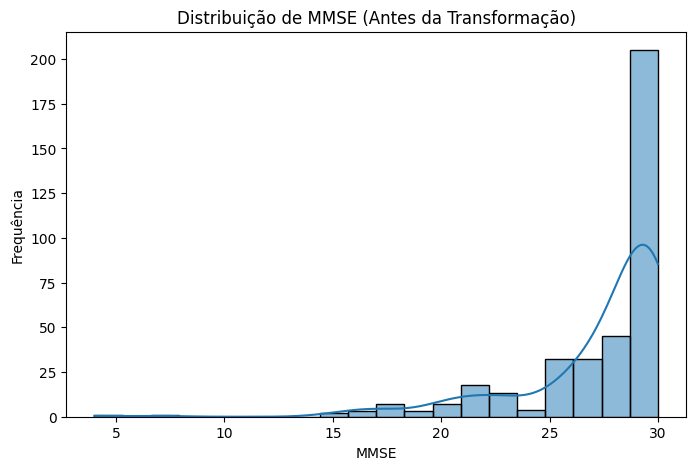

In [31]:
# Plot histogram and KDE (Kernel Density Estimation) of MMSE
plt.figure(figsize=(8, 5))
sns.histplot(df_longitudinal['MMSE'], kde=True, bins=20)
plt.title("Distribuição de MMSE (Antes da Transformação)")
plt.xlabel("MMSE")
plt.ylabel("Frequência")
plt.show()

In [32]:
# Summary statistics for numerical variables
print("\nEstatísticas Descritivas - Cross-Sectional:")
print(df_cross_sectional.describe())

print("\nEstatísticas Descritivas - Longitudinal:")
print(df_longitudinal.describe())


Estatísticas Descritivas - Cross-Sectional:
              Age        Educ         SES       MMSE         CDR         eTIV  \
count  235.000000  235.000000  235.000000  235.00000  235.000000   235.000000   
mean    72.344681    3.178723    2.523648   27.06383    0.285106  1459.497872   
std     12.091369    1.311510    1.089556    3.69687    0.383405   160.368070   
min     33.000000    1.000000    1.000000   14.00000    0.000000  1123.000000   
25%     66.000000    2.000000    2.000000   26.00000    0.000000  1348.000000   
50%     73.000000    3.000000    2.011380   29.00000    0.000000  1447.000000   
75%     81.000000    4.000000    3.258874   30.00000    0.500000  1548.000000   
max     96.000000    5.000000    5.000000   30.00000    2.000000  1992.000000   

             nWBV         ASF  
count  235.000000  235.000000  
mean     0.749132    1.216511  
std      0.047906    0.129427  
min      0.644000    0.881000  
25%      0.713500    1.133500  
50%      0.747000    1.213000  
7

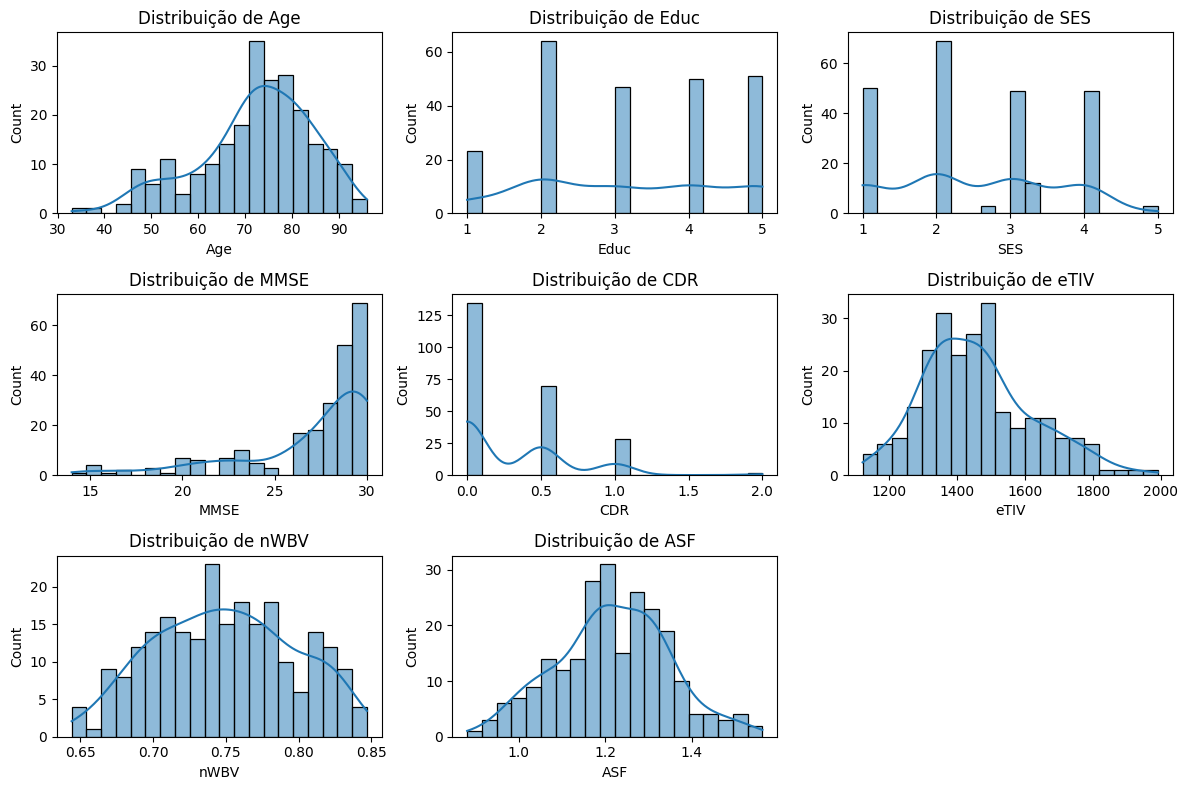

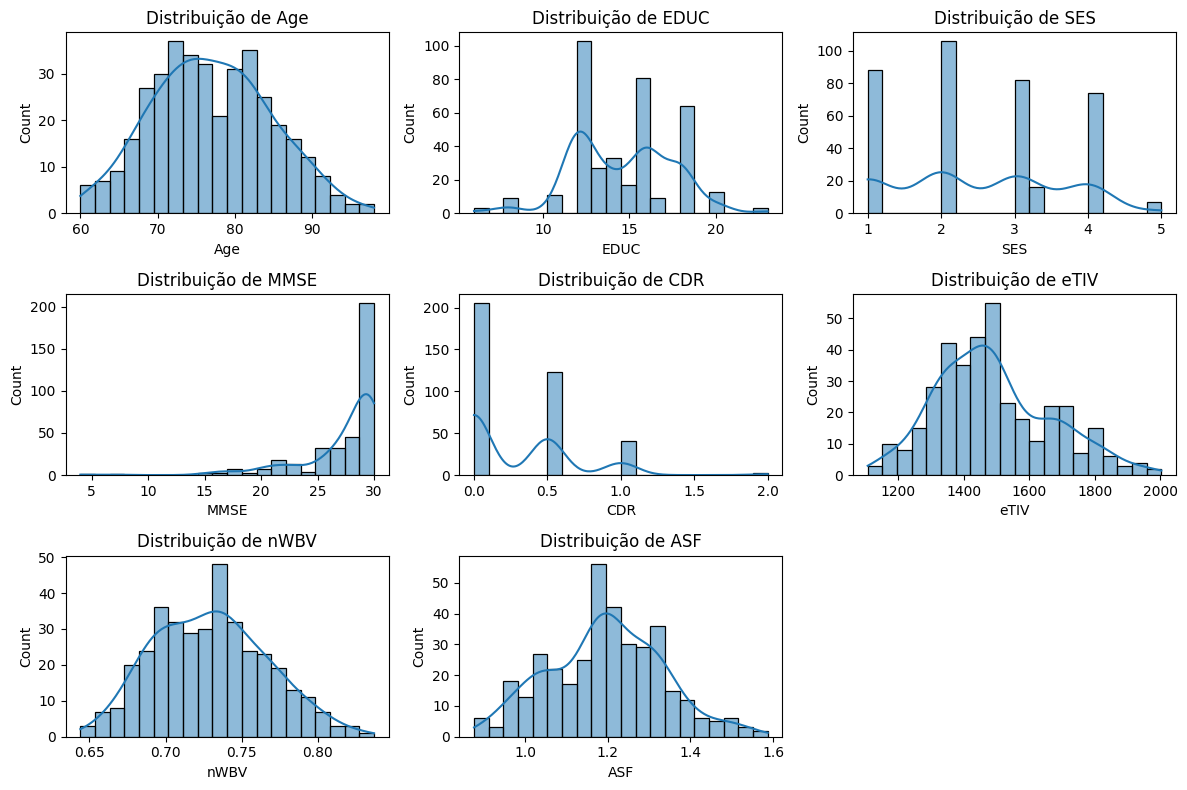

In [33]:
# Define columns to plot
numeric_cols_cross = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
numeric_cols_long = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Histograms for Cross-Sectional dataset
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols_cross, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cross_sectional[col], kde=True, bins=20)
    plt.title(f"Distribuição de {col}")
plt.tight_layout()
plt.show()

# Histograms for Longitudinal dataset
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols_long, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_longitudinal[col], kde=True, bins=20)
    plt.title(f"Distribuição de {col}")
plt.tight_layout()
plt.show()

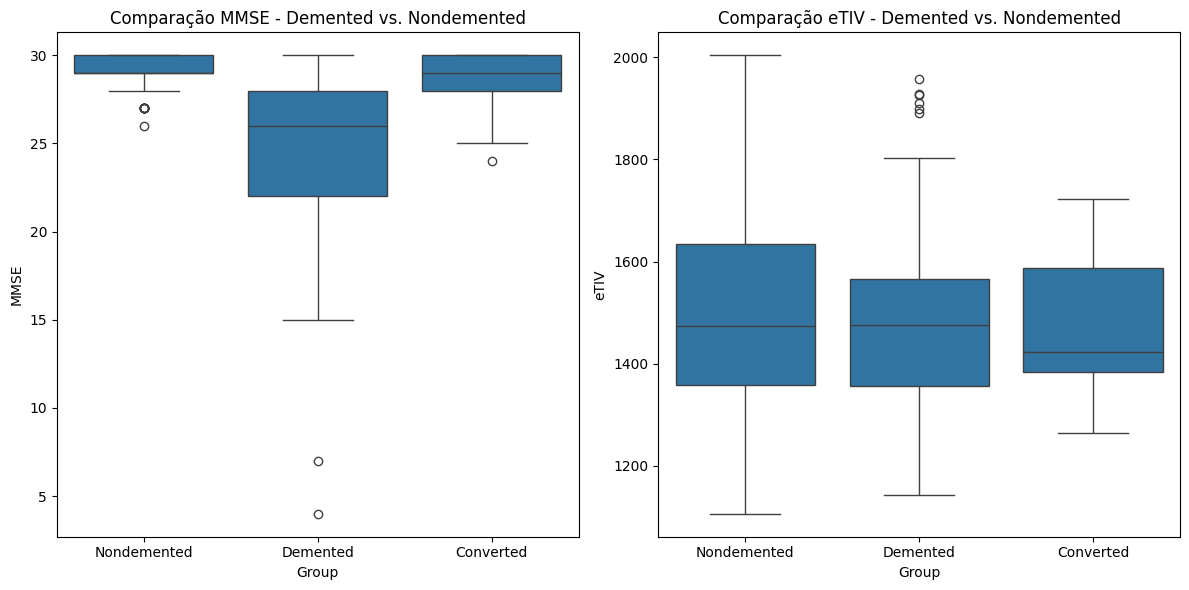

In [35]:
# Boxplots comparing Demented vs. Nondemented
plt.figure(figsize=(12, 6))

# MMSE by Group
plt.subplot(1, 2, 1)
sns.boxplot(x=df_longitudinal['Group'], y=df_longitudinal['MMSE'])
plt.title("Comparação MMSE - Demented vs. Nondemented")

# eTIV by Group
plt.subplot(1, 2, 2)
sns.boxplot(x=df_longitudinal['Group'], y=df_longitudinal['eTIV'])
plt.title("Comparação eTIV - Demented vs. Nondemented")

plt.tight_layout()
plt.show()

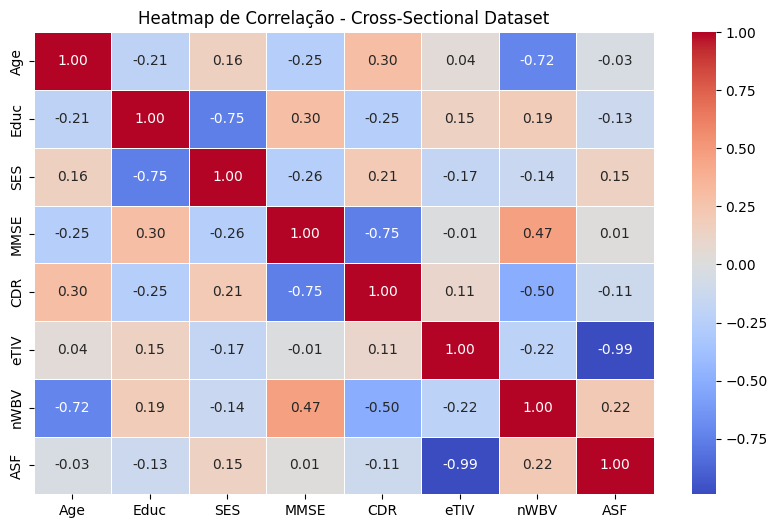

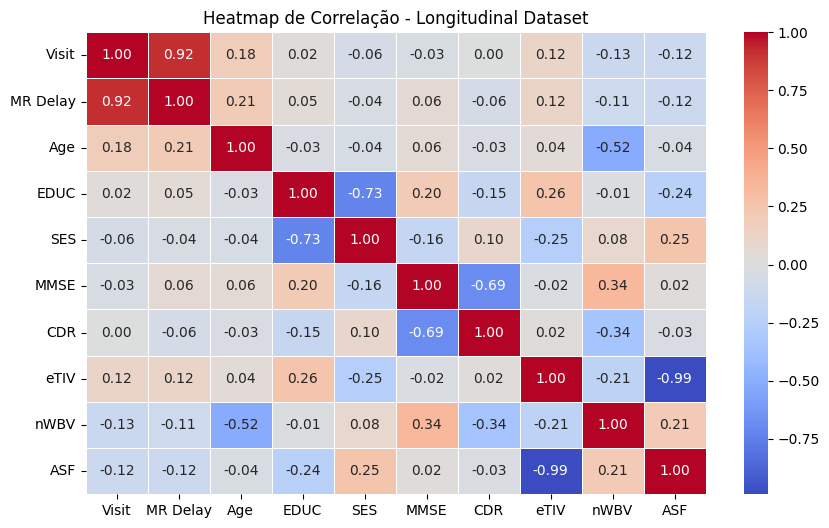

In [37]:
# Select only numeric columns
numeric_cols_cross = df_cross_sectional.select_dtypes(include=['int64', 'float64'])
numeric_cols_long = df_longitudinal.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrices
correlation_cross = numeric_cols_cross.corr()
correlation_long = numeric_cols_long.corr()

# Heatmap for Cross-Sectional dataset
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_cross, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação - Cross-Sectional Dataset")
plt.show()

# Heatmap for Longitudinal dataset
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_long, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação - Longitudinal Dataset")
plt.show()

In [47]:
#saving datasets after treatment 
df_cross_sectional.to_csv("./data/oasis_cross-sectional-processed.csv", index=False)
df_longitudinal.to_csv("./data/oasis_longitudinal-processed.csv", index=False)

/var/folders/bm/mgl_m43n5xlg_y_h5nywrn7h0000gp/T/ipykernel_3769/3148187235.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prevalence_percentage.index, y=prevalence_percentage.values, palette={"M": "#1f77b4", "F": "#ff7f0e"}, ax=axes[1, 1])
/var/folders/bm/mgl_m43n5xlg_y_h5nywrn7h0000gp/T/ipykernel_3769/3148187235.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Condition", y="nWBV", palette=custom_palette, ax=axes[2, 1])


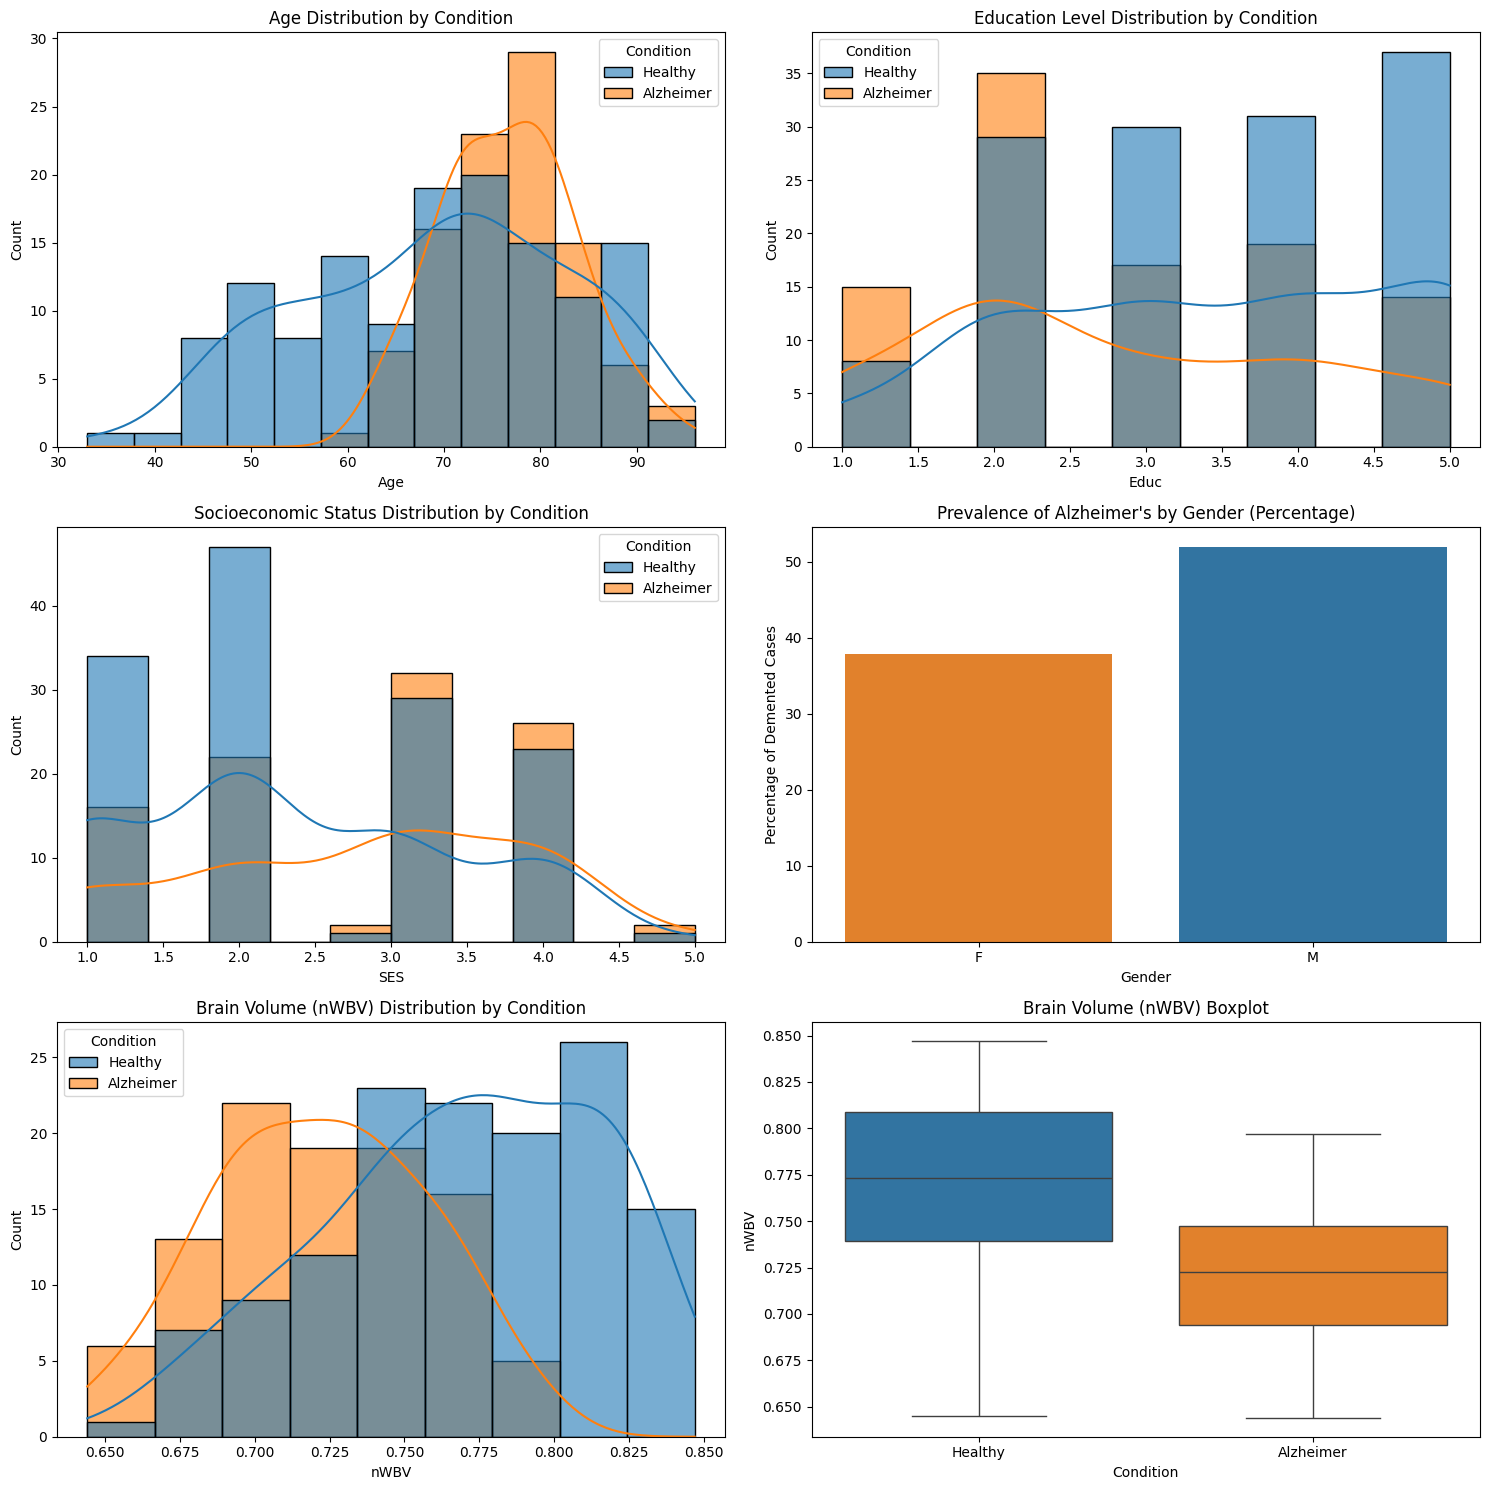

Statistical tests for mean differences between groups (cross-sectional):
Age - p-value: 0.00000
Education Level - p-value: 0.00026
Socioeconomic Status - p-value: 0.00148
Brain Volume (nWBV) - p-value: 0.00000


Statistical test for gender differences in Alzheimer's prevalence:
Chi-Square value: 3.69548
p-value: 0.05456
# No statistically significant difference in Alzheimer prevalence between genders.


In [69]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the CROSS-SECTIONAL dataset
df = pd.read_csv("./data/oasis_cross-sectional-processed.csv")

# Classify Healthy (CDR=0) and Alzheimer (CDR>0)
df['Condition'] = df['CDR'].apply(lambda x: 'Healthy' if x == 0 else 'Alzheimer')

# Set a **consistent** color palette (Blue for Healthy, Orange for Alzheimer)
custom_palette = {"Healthy": "#1f77b4", "Alzheimer": "#ff7f0e"}  # Blue & Orange

# Create visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Age distribution by condition
sns.histplot(data=df, x="Age", kde=True, hue="Condition", ax=axes[0, 0], palette=custom_palette, alpha=0.6)
axes[0, 0].set_title("Age Distribution by Condition")

# Education level distribution by condition
sns.histplot(data=df, x="Educ", kde=True, hue="Condition", ax=axes[0, 1], palette=custom_palette, alpha=0.6)
axes[0, 1].set_title("Education Level Distribution by Condition")

# Socioeconomic status distribution by condition
sns.histplot(data=df, x="SES", kde=True, hue="Condition", ax=axes[1, 0], palette=custom_palette, alpha=0.6)
axes[1, 0].set_title("Socioeconomic Status Distribution by Condition")

# Calculate prevalence of Alzheimer's by gender (percentage)
total_gender_counts = df["M/F"].value_counts()  # Total number of men and women
demented_gender_counts = df[df["Condition"] == "Alzheimer"]["M/F"].value_counts()  # Demented count

# Calculate percentage prevalence
prevalence_percentage = (demented_gender_counts / total_gender_counts) * 100

# Replace boxplot with bar chart showing percentage of Alzheimer's by gender
sns.barplot(x=prevalence_percentage.index, y=prevalence_percentage.values, palette={"M": "#1f77b4", "F": "#ff7f0e"}, ax=axes[1, 1])
axes[1, 1].set_title("Prevalence of Alzheimer's by Gender (Percentage)")
axes[1, 1].set_xlabel("Gender")
axes[1, 1].set_ylabel("Percentage of Demented Cases")

# Brain Volume (nWBV) distribution by condition
sns.histplot(data=df, x="nWBV", hue="Condition", kde=True, ax=axes[2, 0], palette=custom_palette, alpha=0.6)
axes[2, 0].set_title("Brain Volume (nWBV) Distribution by Condition")

# Boxplot for nWBV to show the median difference
sns.boxplot(data=df, x="Condition", y="nWBV", palette=custom_palette, ax=axes[2, 1])
axes[2, 1].set_title("Brain Volume (nWBV) Boxplot")

plt.tight_layout()
plt.show()

# Statistical tests
age_pval = stats.ttest_ind(df[df['Condition'] == 'Healthy']['Age'], 
                           df[df['Condition'] == 'Alzheimer']['Age'], nan_policy='omit').pvalue
educ_pval = stats.ttest_ind(df[df['Condition'] == 'Healthy']['Educ'], 
                            df[df['Condition'] == 'Alzheimer']['Educ'], nan_policy='omit').pvalue
ses_pval = stats.ttest_ind(df[df['Condition'] == 'Healthy']['SES'], 
                           df[df['Condition'] == 'Alzheimer']['SES'], nan_policy='omit').pvalue
nwbv_pval = stats.ttest_ind(df[df['Condition'] == 'Healthy']['nWBV'], 
                            df[df['Condition'] == 'Alzheimer']['nWBV'], nan_policy='omit').pvalue

# Display statistical test results
print("Statistical tests for mean differences between groups (cross-sectional):")
print(f"Age - p-value: {age_pval:.5f}")
print(f"Education Level - p-value: {educ_pval:.5f}")
print(f"Socioeconomic Status - p-value: {ses_pval:.5f}")
print(f"Brain Volume (nWBV) - p-value: {nwbv_pval:.5f}")

# Create a contingency table (frequency table of gender vs. condition)
contingency_table = pd.crosstab(df["M/F"], df["Condition"])

# Perform a Chi-Square test to check for dependency between gender and Alzheimer
chi2, p_value_gender, dof, expected = stats.chi2_contingency(contingency_table)

# Display the p-value for gender
print("\n")
print("Statistical test for gender differences in Alzheimer's prevalence:")
print(f"Chi-Square value: {chi2:.5f}")
print(f"p-value: {p_value_gender:.5f}")

# Comment to summarize the result
if p_value_gender < 0.05:
    print("# The difference in Alzheimer prevalence between genders is statistically significant.")
else:
    print("# No statistically significant difference in Alzheimer prevalence between genders.")

/var/folders/bm/mgl_m43n5xlg_y_h5nywrn7h0000gp/T/ipykernel_3769/335149237.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prevalence_percentage.index, y=prevalence_percentage.values, palette={"M": "#1f77b4", "F": "#ff7f0e"}, ax=axes[1, 1])
/var/folders/bm/mgl_m43n5xlg_y_h5nywrn7h0000gp/T/ipykernel_3769/335149237.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Condition", y="nWBV", palette=custom_palette, ax=axes[2, 1])


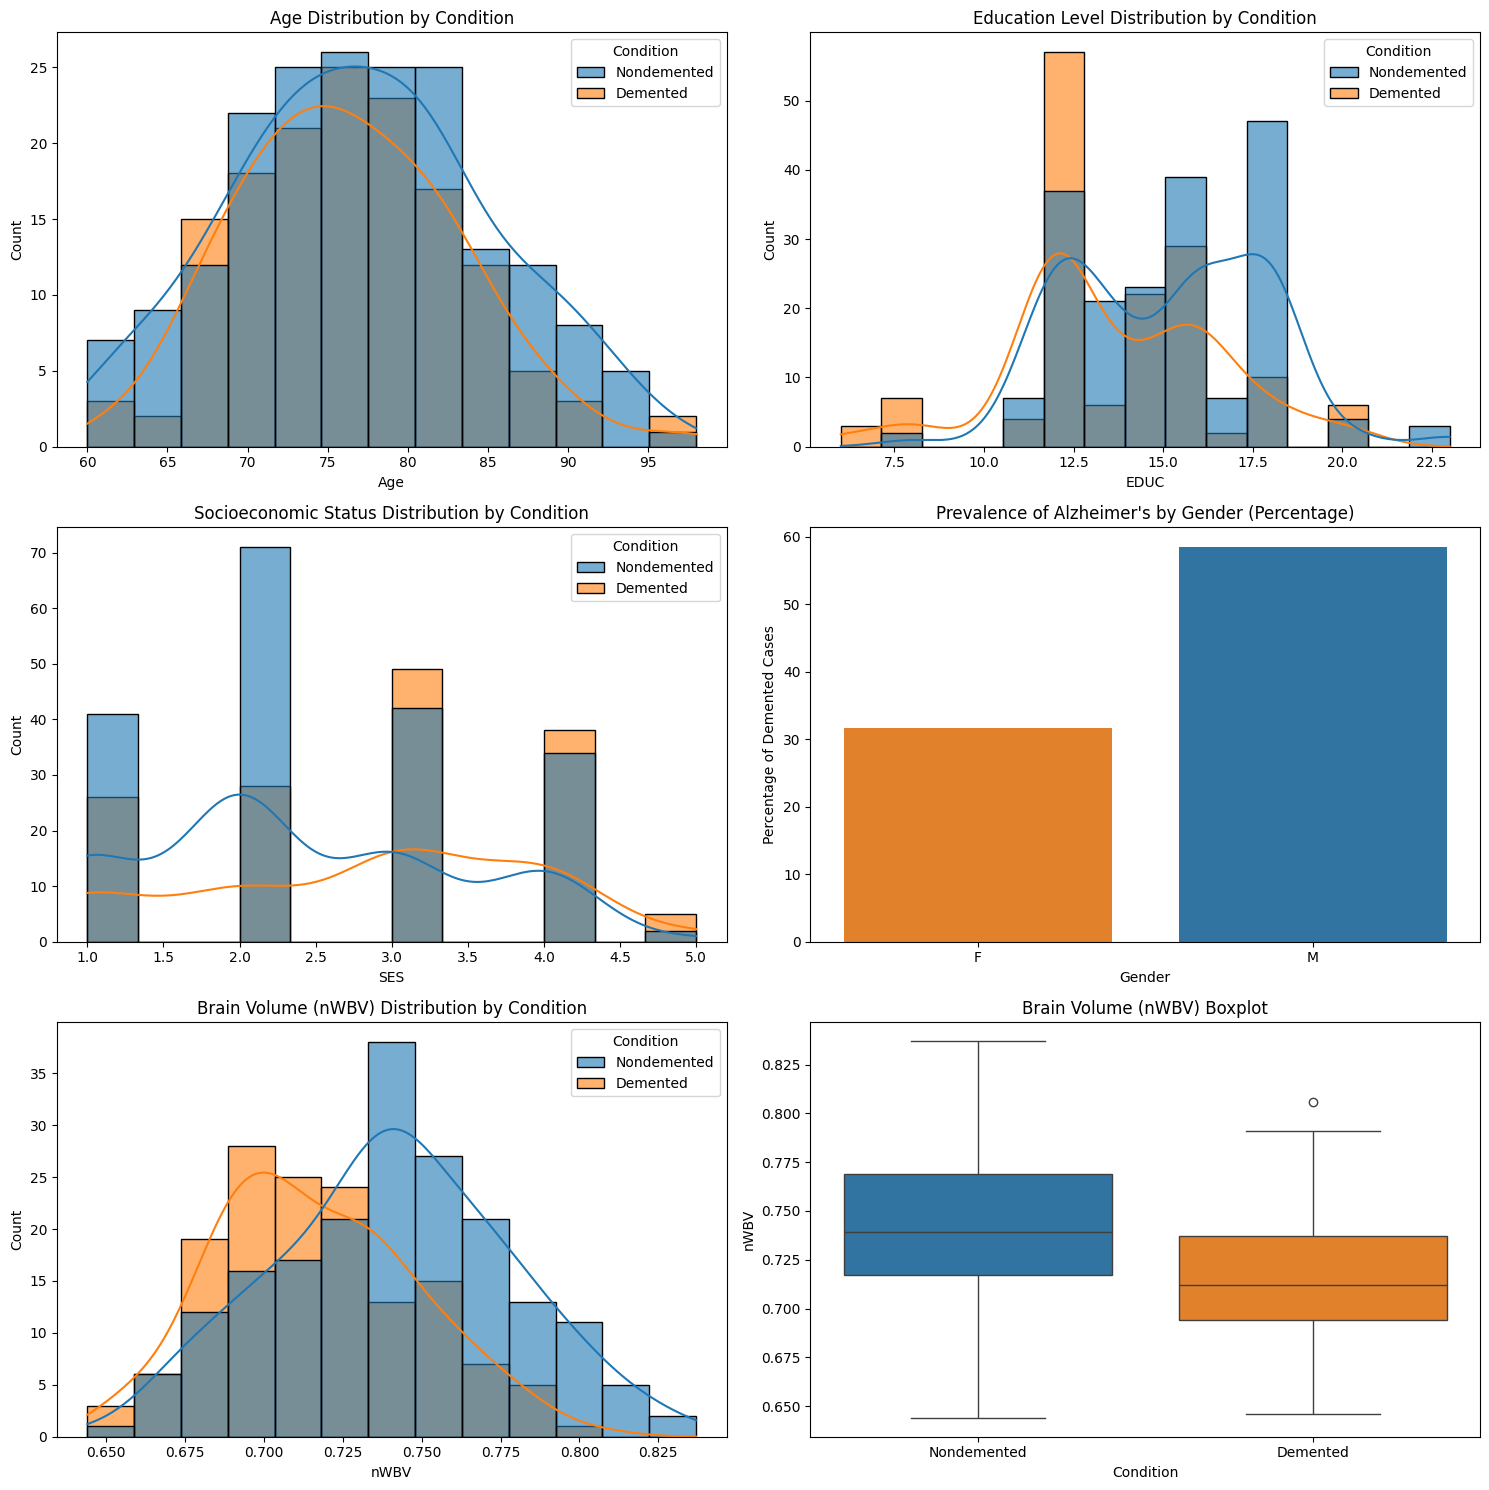

Statistical tests for mean differences between groups (longitudinal - Nondemented vs. Demented):
Age - p-value: 0.34198
Education Level - p-value: 0.00000
Socioeconomic Status - p-value: 0.00061
Brain Volume (nWBV) - p-value: 0.00000


Statistical test for gender differences in Alzheimer's prevalence:
Chi-Square value: 23.01677
p-value: 0.00000
# The difference in Alzheimer prevalence between genders is statistically significant.


In [68]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the processed dataset (LONGITUDINAL)
df = pd.read_csv("./data/oasis_longitudinal-processed.csv")  # Update with the correct dataset path

# Use the "Group" column for classification instead of CDR
df['Condition'] = df['Group']  

# Filter only "Nondemented" and "Demented" groups
df = df[df['Condition'].isin(["Nondemented", "Demented"])]

# Define a consistent color palette
custom_palette = {"Nondemented": "#1f77b4", "Demented": "#ff7f0e"}  # Blue & Red

# Create visualizations to analyze variable distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Age distribution by condition
sns.histplot(data=df, x="Age", hue="Condition", kde=True, ax=axes[0, 0], palette=custom_palette, alpha=0.6)
axes[0, 0].set_title("Age Distribution by Condition")

# Education level distribution by condition
sns.histplot(data=df, x="EDUC", kde=True, hue="Condition", ax=axes[0, 1], palette=custom_palette, alpha=0.6)
axes[0, 1].set_title("Education Level Distribution by Condition")

# Socioeconomic status distribution by condition
sns.histplot(data=df, x="SES", kde=True, hue="Condition", ax=axes[1, 0], palette=custom_palette, alpha=0.6)
axes[1, 0].set_title("Socioeconomic Status Distribution by Condition")

# Calculate prevalence of Alzheimer's by gender (percentage)
total_gender_counts = df["M/F"].value_counts()  # Total number of men and women
demented_gender_counts = df[df["Condition"] == "Demented"]["M/F"].value_counts()  # Demented count

# Calculate percentage prevalence
prevalence_percentage = (demented_gender_counts / total_gender_counts) * 100

# Replace boxplot with bar chart showing percentage of Alzheimer's by gender
sns.barplot(x=prevalence_percentage.index, y=prevalence_percentage.values, palette={"M": "#1f77b4", "F": "#ff7f0e"}, ax=axes[1, 1])
axes[1, 1].set_title("Prevalence of Alzheimer's by Gender (Percentage)")
axes[1, 1].set_xlabel("Gender")
axes[1, 1].set_ylabel("Percentage of Demented Cases")

# Brain Volume (nWBV) distribution by condition
sns.histplot(data=df, x="nWBV", hue="Condition", kde=True, ax=axes[2, 0], palette=custom_palette, alpha=0.6)
axes[2, 0].set_title("Brain Volume (nWBV) Distribution by Condition")

# Boxplot for nWBV to show the median difference
sns.boxplot(data=df, x="Condition", y="nWBV", palette=custom_palette, ax=axes[2, 1])
axes[2, 1].set_title("Brain Volume (nWBV) Boxplot")

plt.tight_layout()
plt.show()

# Statistical tests to check for significant differences
age_pval = stats.ttest_ind(df[df['Condition'] == 'Nondemented']['Age'], 
                           df[df['Condition'] == 'Demented']['Age'], nan_policy='omit').pvalue
educ_pval = stats.ttest_ind(df[df['Condition'] == 'Nondemented']['EDUC'], 
                            df[df['Condition'] == 'Demented']['EDUC'], nan_policy='omit').pvalue
ses_pval = stats.ttest_ind(df[df['Condition'] == 'Nondemented']['SES'], 
                           df[df['Condition'] == 'Demented']['SES'], nan_policy='omit').pvalue
nwbv_pval = stats.ttest_ind(df[df['Condition'] == 'Nondemented']['nWBV'], 
                            df[df['Condition'] == 'Demented']['nWBV'], nan_policy='omit').pvalue

# Display statistical test results
print("Statistical tests for mean differences between groups (longitudinal - Nondemented vs. Demented):")
print(f"Age - p-value: {age_pval:.5f}")
print(f"Education Level - p-value: {educ_pval:.5f}")
print(f"Socioeconomic Status - p-value: {ses_pval:.5f}")
print(f"Brain Volume (nWBV) - p-value: {nwbv_pval:.5f}")

# Create a contingency table (frequency table of gender vs. condition)
contingency_table = pd.crosstab(df["M/F"], df["Condition"])

# Perform a Chi-Square test to check for dependency between gender and Alzheimer
chi2, p_value_gender, dof, expected = stats.chi2_contingency(contingency_table)

# Display the p-value for gender
print("\n")
print("Statistical test for gender differences in Alzheimer's prevalence:")
print(f"Chi-Square value: {chi2:.5f}")
print(f"p-value: {p_value_gender:.5f}")

# Comment to summarize the result
if p_value_gender < 0.05:
    print("# The difference in Alzheimer prevalence between genders is statistically significant.")
else:
    print("# No statistically significant difference in Alzheimer prevalence between genders.")

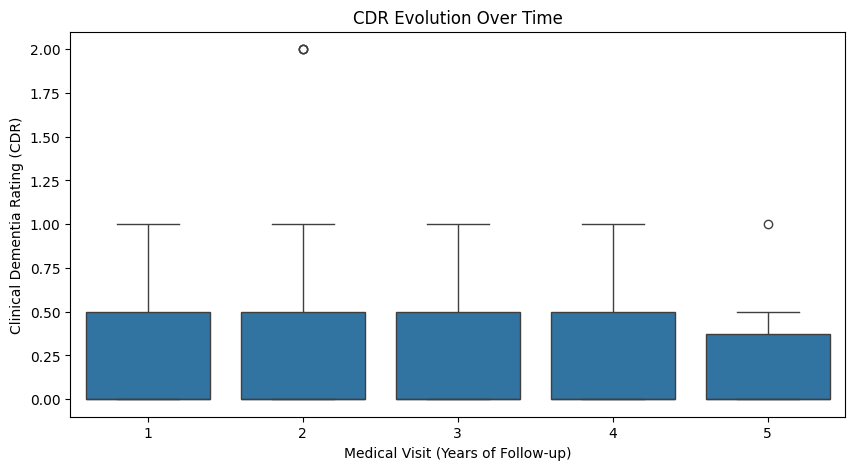

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the longitudinal dataset
df_long = pd.read_csv("./data/oasis_longitudinal-processed.csv")

# Plot the evolution of CDR across visits
plt.figure(figsize=(10, 5))
sns.boxplot(x="Visit", y="CDR", data=df_long)
plt.xlabel("Medical Visit (Years of Follow-up)")
plt.ylabel("Clinical Dementia Rating (CDR)")
plt.title("CDR Evolution Over Time")
plt.show()

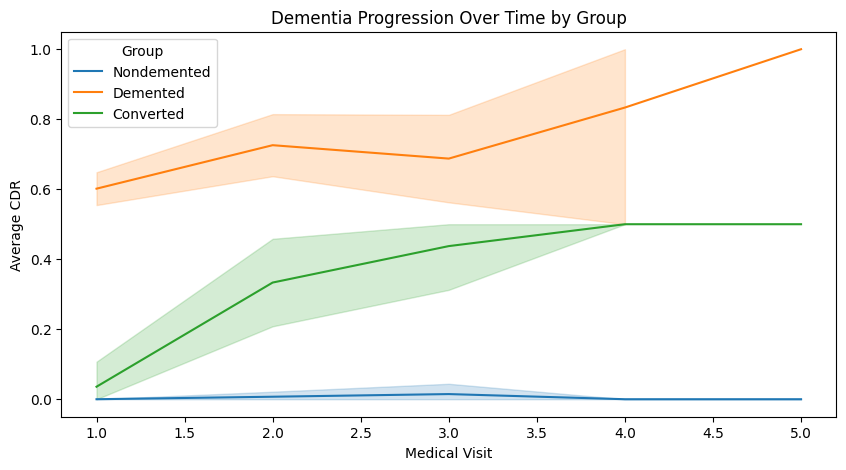

In [4]:
# Line plot to compare CDR progression over time for different groups
plt.figure(figsize=(10, 5))
sns.lineplot(x="Visit", y="CDR", hue="Group", data=df_long, estimator='mean')
plt.xlabel("Medical Visit")
plt.ylabel("Average CDR")
plt.title("Dementia Progression Over Time by Group")
plt.legend(title="Group")
plt.show()

In [5]:
# Filter only individuals who started as Nondemented and later developed dementia
df_converted = df_long[df_long["Group"] == "Converted"]

# Calculate the average time for conversion
avg_conversion_time = df_converted.groupby("Subject ID")["Visit"].min().mean()
print(f"Average time for an individual to develop dementia: {avg_conversion_time:.2f} years")

Average time for an individual to develop dementia: 1.00 years


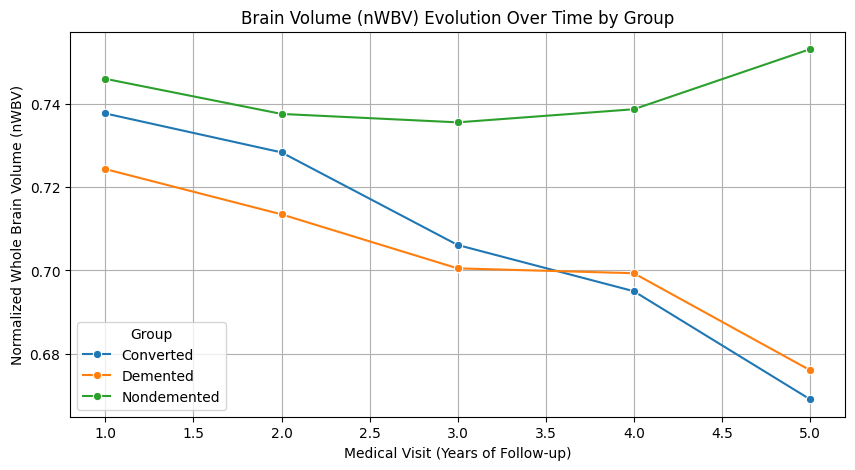

In [6]:
# Group by Visit and Group to get the mean nWBV for each group over time
df_nwbv_evolution = df_long.groupby(['Visit', 'Group'])['nWBV'].mean().reset_index()

# Plot the evolution of nWBV over time for each group
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_nwbv_evolution, x='Visit', y='nWBV', hue='Group', marker='o')

plt.title("Brain Volume (nWBV) Evolution Over Time by Group")
plt.xlabel("Medical Visit (Years of Follow-up)")
plt.ylabel("Normalized Whole Brain Volume (nWBV)")
plt.legend(title="Group")
plt.grid(True)
plt.show()

In [10]:
# Define the bins and labels based on the cross-sectional Educ levels
bins = [0, 6, 9, 12, 16, 25]  # Faixas baseadas em anos de estudo
labels = [1, 2, 3, 4, 5]  # Correspondendo aos níveis de Educ

# Convert EDUC (years) into Educ (levels)
df_long['Educ'] = pd.cut(df_long['EDUC'], bins=bins, labels=labels, right=False)

# Convert Educ to integer for easier analysis
df_long['Educ'] = df_long['Educ'].astype(int)

# Verify the conversion
df_long[['EDUC', 'Educ']].head()

,EDUC,Educ
0,14,4
1,14,4
2,12,4
3,12,4
4,12,4


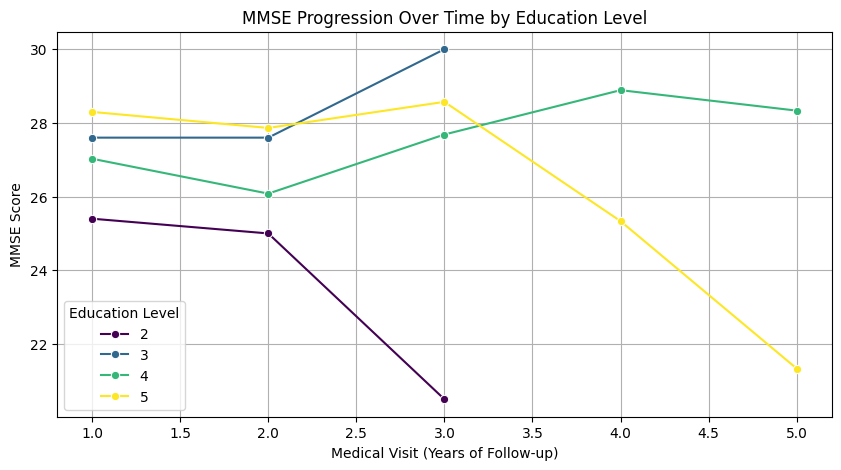

In [11]:
# Group by Visit and Educ to calculate the mean MMSE
df_long_grouped = df_long.groupby(['Visit', 'Educ'])['MMSE'].mean().reset_index()

# Plot MMSE progression over time by Educ level
plt.figure(figsize=(10,5))
sns.lineplot(data=df_long_grouped, x="Visit", y="MMSE", hue="Educ", marker="o", palette="viridis")

plt.title("MMSE Progression Over Time by Education Level")
plt.xlabel("Medical Visit (Years of Follow-up)")
plt.ylabel("MMSE Score")
plt.legend(title="Education Level")
plt.grid(True)
plt.show()

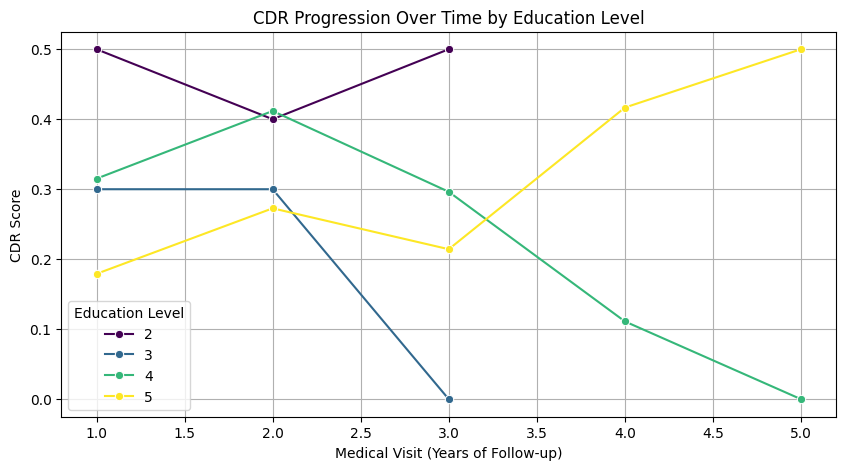

In [12]:
# Group by Visit and Educ to calculate the mean CDR
df_long_grouped_cdr = df_long.groupby(['Visit', 'Educ'])['CDR'].mean().reset_index()

# Plot CDR progression over time by Educ level
plt.figure(figsize=(10,5))
sns.lineplot(data=df_long_grouped_cdr, x="Visit", y="CDR", hue="Educ", marker="o", palette="viridis")

plt.title("CDR Progression Over Time by Education Level")
plt.xlabel("Medical Visit (Years of Follow-up)")
plt.ylabel("CDR Score")
plt.legend(title="Education Level")
plt.grid(True)
plt.show()

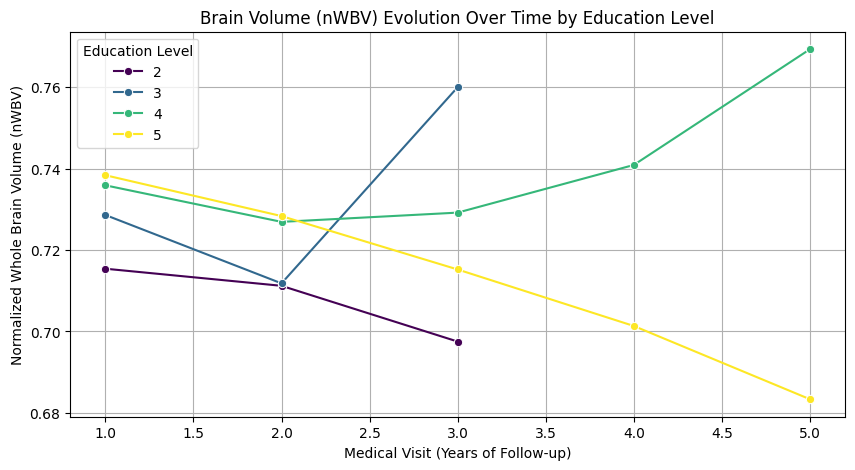

In [13]:
# Group by Visit and Educ to calculate the mean nWBV
df_long_grouped_nwbv = df_long.groupby(['Visit', 'Educ'])['nWBV'].mean().reset_index()

# Plot nWBV progression over time by Educ level
plt.figure(figsize=(10,5))
sns.lineplot(data=df_long_grouped_nwbv, x="Visit", y="nWBV", hue="Educ", marker="o", palette="viridis")

plt.title("Brain Volume (nWBV) Evolution Over Time by Education Level")
plt.xlabel("Medical Visit (Years of Follow-up)")
plt.ylabel("Normalized Whole Brain Volume (nWBV)")
plt.legend(title="Education Level")
plt.grid(True)
plt.show()